## Regression
![Regression](/images/regression.png "Regression variables")

### Simple Regression
1. Semple linear regression
1. Simple Non-linear regression
    - Ex: Predict co2emission x engineSize of all cars

### Multiple Regression
1. Multiple linear regression
1. Multiple Non-linear regression;
    - Ex: Predict co2emission x engineSize x cylinders of all cars

### Applications of Regression
1. Sales forecasting
1. Satisfaction analysis
1. Price estimation
1. Employment income


### Step 1: Import database

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [107]:
df = pd.read_csv("../src/FuelConsumptionCo2.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


### Step 2: Select importants columns

In [108]:
new_df = df[["ENGINESIZE", "CYLINDERS", "CO2EMISSIONS"]]
x = new_df["ENGINESIZE"]
y = new_df["CO2EMISSIONS"]

### Plotting data | we want to know angular and linear coefficients

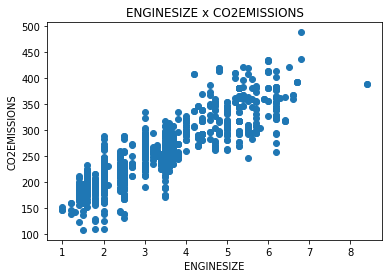

In [109]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_title(f'{x.name} x {y.name}')
ax.set_xlabel(x.name)
ax.set_ylabel(y.name)
plt.show()

### Step 3: Split in train/test datasets

In [110]:
#FROM SCRATCH
#mask = np.random.rand(len(df)) < .8
#train = new_df[mask]
#test = new_df[~mask]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)

### Step 4: Fitting data and plotting

(from scratch) Angular Coefficient:  39.12519978671173
(from scratch) Linear Coefficient :  125.30409949535681
angular_coefficient: 39.16827830596884
linear_coeffieicent: 126.0036091541026


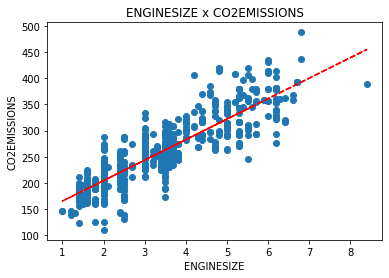

In [111]:
#FROM SCRATCH

x_sum = ((np.array(x)/len(x)).sum())
y_sum = ((np.array(y)/len(y)).sum())

upper_division = ((x - x_sum)*(y - y_sum)).sum()
down_division = ((x - x_sum)*(x - x_sum)).sum()
theta1 = upper_division/down_division
theta0 = y_sum - (theta1 * x_sum)

print ("(from scratch) Angular Coefficient: ", theta1)
print ("(from scratch) Linear Coefficient : ", theta0)

###

regression = linear_model.LinearRegression()
regression.fit(x_train.values.reshape(-1, 1) , y_train)
angular_coefficient = regression.coef_[0]
linear_coeffieicent = regression.intercept_
print(f"angular_coefficient: {angular_coefficient}")
print(f"linear_coeffieicent: {linear_coeffieicent}")

equation = angular_coefficient*x_train + linear_coeffieicent

fig, ax = plt.subplots()
ax.scatter(x_train, y_train)
ax.plot(x_train, equation, "--r")
ax.set_title(f'{x.name} x {y.name}')
ax.set_xlabel(x.name)
ax.set_ylabel(y.name)
plt.show()


### Step 5: Predicting and Check Accuracy of regression model (Error)

In [112]:
y_predicted = regression.predict(x_test.values.reshape(-1,1))

print(f"Mean squared Error: {mean_squared_error(y_test, y_predicted):.2f}")
print(f"Mean absolute Error: {mean_absolute_error(y_test, y_predicted):.2f}")
print(f"R2-score Error: {r2_score(y_test, y_predicted):.2f}")

Mean squared Error: 957.63
Mean absolute Error: 23.56
R2-score Error: 0.76


### Step 6: Differences

In [113]:
equation2 = angular_coefficient * 2.4 + linear_coeffieicent
print(f"Predicting Y value with x => 2.4 = {equation2}")

pred_df = pd.DataFrame({
    "ACTUAL": y_test,
    "PREDICTED": y_predicted,
    "DIFFERENCE": y_test-y_predicted
})
pred_df

Predicting Y value with x => 2.4 = 220.00747708842783


,ACTUAL,PREDICTED,DIFFERENCE
732,304,310.094517,-6.094517
657,221,263.092583,-42.092583
168,294,267.009411,26.990589
86,221,243.508444,-22.508444
411,207,204.340166,2.659834
...,...,...,...
9,212,220.007477,-8.007477
405,184,204.340166,-20.340166
196,258,368.846935,-110.846935
813,196,188.672854,7.327146


## Multiple Linear Regression

#

### Step 1: Import database


### Step 2: Select importants columns

In [114]:
x = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]]
y = df["CO2EMISSIONS"]


### Step 3: Split in train/test datasets

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)

### Step 4: Fitting data and plotting

In [116]:
regression = linear_model.LinearRegression()
regression.fit(x_train, y_train)
angular_coefficient = regression.coef_
linear_coefficient = regression.intercept_
print(f"Angular coefficient: {angular_coefficient}, Linear Coefficient: {linear_coefficient}")

Angular coefficient: [10.94928339  7.09566693  9.75665944], Linear Coefficient: 66.08405043684948


### Step 5: Predicting and Check Accuracy of regression model (Error)

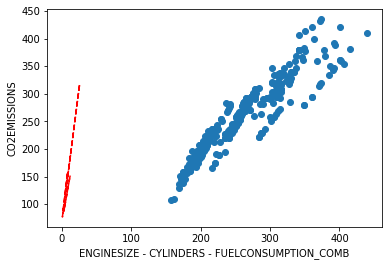

Mean Squared Error: 542.92
Mean Absolute Error: 16.94
R2-score: 86.67%


In [117]:
y_predicted = regression.predict(x_test)

fig, ax = plt.subplots()
ax.set_xlabel(" - ".join(x.columns))
ax.set_ylabel(y.name)
ax.scatter(y_predicted, y_test)
ax.plot(x, x*angular_coefficient+linear_coefficient, "--r")

plt.show()

print(f"Mean Squared Error: {mean_squared_error(y_test, y_predicted):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_predicted):.2f}")
print(f"R2-score: {r2_score(y_test, y_predicted)*100:.2f}%")

### Step 6: Differences

In [118]:
pred_df = pd.DataFrame({
    "ACTUAL": y_test,
    "PREDICTED": y_predicted,
    "DIFFERENCE": y_test-y_predicted
})
pred_df

,ACTUAL,PREDICTED,DIFFERENCE
732,304,303.098922,0.901078
657,221,240.644475,-19.644475
168,294,272.960713,21.039287
86,221,235.169833,-14.169833
411,207,204.175220,2.824780
...,...,...,...
9,212,210.506265,1.493735
405,184,194.418560,-10.418560
196,258,300.009529,-42.009529
813,196,194.917177,1.082823
